<a href="https://colab.research.google.com/github/sowmiya21092005/nm-project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
#Load the MNIST dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#preprocess the data : normalize the images
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
# Build a neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the images
    layers.Dense(128, activation='relu'),  # Dense hidden layer
    layers.Dropout(0.2),                   # Dropout for regularization
    layers.Dense(10, activation='softmax') # Output layer with 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8531 - loss: 0.4961
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9574 - loss: 0.1436
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9684 - loss: 0.1051
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9723 - loss: 0.0875
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9771 - loss: 0.0745


In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 3ms/step - accuracy: 0.9761 - loss: 0.0794
Test accuracy: 0.9761000275611877


In [ ]:
# Save the model (optional)
model.save("mnist_digit_recognition_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


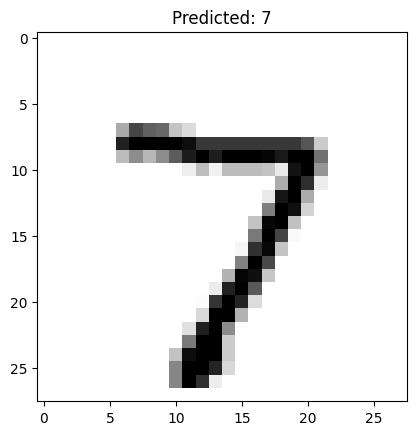

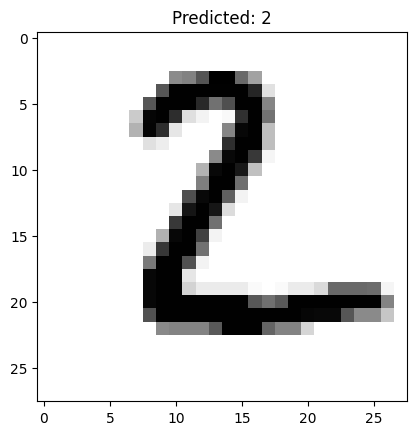

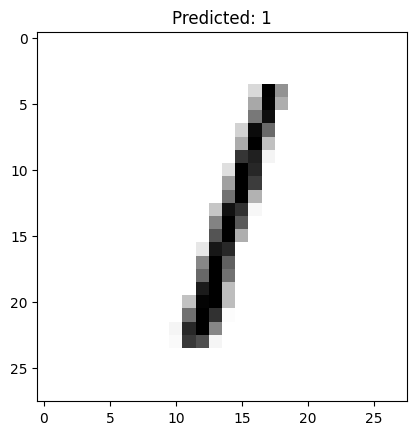

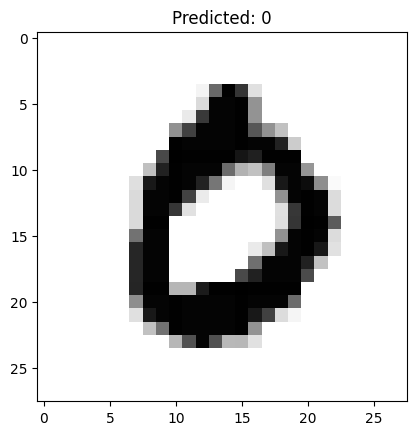

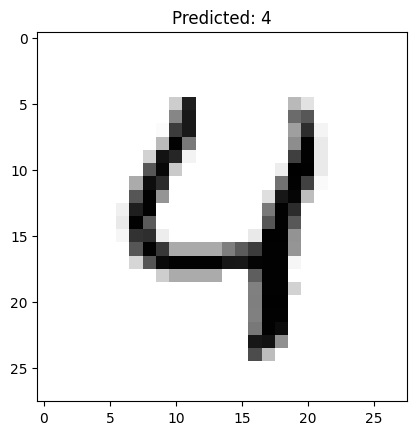

In [ ]:
# Predict some digits from the test set and display them
predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {predictions[i].argmax()}")
    plt.show()